# Top Spotify Songs in 73 Countries (EDA)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv("Top_spotify_songs.csv")
spotify.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,1,0,NaN,2025-02-17,98,False,...,6,-7.777,0,0.0304,0.3080,0.0000,0.122,0.535,157.969,3
1,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",2,1,4,NaN,2025-02-17,90,False,...,2,-7.546,1,0.1250,0.2510,0.0000,0.248,0.576,138.008,4
2,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,3,-2,8,NaN,2025-02-17,92,True,...,1,-7.001,1,0.0776,0.0107,0.0000,0.141,0.214,101.061,4
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",4,0,-2,NaN,2025-02-17,89,False,...,0,-4.477,0,0.2600,0.0283,0.0000,0.355,0.939,149.027,4
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,-2,NaN,2025-02-17,96,False,...,2,-10.171,1,0.0358,0.2000,0.0608,0.117,0.438,104.978,4


In [3]:
spotify.shape

(1728382, 25)

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728382 entries, 0 to 1728381
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      int6

In [5]:
spotify.isnull().sum()

spotify_id                0
name                     30
artists                  29
daily_rank                0
daily_movement            0
weekly_movement           0
country               23607
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              821
album_release_date      658
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

In [6]:
spotify['name'] = spotify['name'].fillna('Unknown name')
spotify['artists'] = spotify['artists'].fillna('Unknown artist')
spotify['country'] = spotify['country'].fillna(spotify['country'].mode()[0])
spotify['album_name'] = spotify['album_name'].fillna('Unknown album')
spotify['album_release_date'] = spotify['album_release_date'].fillna('Unknown')

In [7]:
spotify.isnull().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [8]:
print(spotify[['snapshot_date', 'album_release_date']].dtypes)

snapshot_date         object
album_release_date    object
dtype: object


In [9]:
print(spotify['album_release_date'].head(10))

0    2024-08-16
1    2024-11-21
2    2024-05-04
3    2024-12-06
4    2024-05-17
5    2018-02-09
6    2025-01-05
7    2024-11-22
8    2025-01-05
9    2024-10-18
Name: album_release_date, dtype: object


In [10]:
spotify['snapshot_date'] = pd.to_datetime(spotify['snapshot_date'], errors = 'coerce')
spotify['album_release_date'] = pd.to_datetime(spotify['album_release_date'], errors = 'coerce')

In [11]:
print(spotify[['snapshot_date', 'album_release_date']].dtypes)

snapshot_date         datetime64[ns]
album_release_date    datetime64[ns]
dtype: object


In [12]:
print("oldest album release date", spotify['album_release_date'].min())
print("newest album release date", spotify['album_release_date'].max())

oldest album release date 1900-01-01 00:00:00
newest album release date 2025-02-17 00:00:00


In [13]:
invalidd = spotify[spotify['album_release_date'].isna()]
print("number of invalid dates:", len(invalidd))

number of invalid dates: 658


In [14]:
print(invalidd[['album_release_date']].head(10))

       album_release_date
120432                NaT
189350                NaT
190439                NaT
190440                NaT
190936                NaT
190937                NaT
191178                NaT
191184                NaT
191782                NaT
191800                NaT


In [15]:
spotify = spotify.dropna(subset = ['album_release_date']) 

In [16]:
print("Invalid dates: ", spotify['album_release_date'].isna().sum())

Invalid dates:  0


In [17]:
spotify.head(10)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,1,0,DO,2025-02-17,98,False,...,6,-7.777,0,0.0304,0.3080,0.000000,0.1220,0.535,157.969,3
1,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",2,1,4,DO,2025-02-17,90,False,...,2,-7.546,1,0.1250,0.2510,0.000000,0.2480,0.576,138.008,4
2,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,3,-2,8,DO,2025-02-17,92,True,...,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,4
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",4,0,-2,DO,2025-02-17,89,False,...,0,-4.477,0,0.2600,0.0283,0.000000,0.3550,0.939,149.027,4
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,-2,DO,2025-02-17,96,False,...,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
5,3GCdLUSnKSMJhs4Tj6CV3s,All The Stars (with SZA),"Kendrick Lamar, SZA",6,-1,23,DO,2025-02-17,90,True,...,8,-4.946,1,0.0599,0.0612,0.000195,0.0926,0.557,96.782,4
6,3sK8wGT43QFpWrvNQsrQya,DtMF,Bad Bunny,7,0,-3,DO,2025-02-17,97,True,...,7,-27.405,0,0.0717,0.1770,0.218000,0.0807,0.032,136.020,4
7,0aB0v4027ukVziUGwVGYpG,tv off (feat. lefty gunplay),"Kendrick Lamar, Lefty Gunplay",8,0,13,DO,2025-02-17,92,True,...,6,-6.679,0,0.2630,0.0837,0.000000,0.4230,0.548,100.036,4
8,2lTm559tuIvatlT1u0JYG2,BAILE INoLVIDABLE,Bad Bunny,9,0,-2,DO,2025-02-17,94,True,...,10,-46.113,1,0.0615,0.1920,0.790000,0.1120,0.219,119.387,3
9,7ne4VBA60CxGM75vw0EYad,That’s So True,Gracie Abrams,10,0,-2,DO,2025-02-17,94,True,...,1,-4.169,1,0.0368,0.2140,0.000000,0.1590,0.372,108.548,4


In [18]:
spotifyu = spotify.drop_duplicates(subset=['name', 'country'], keep='first')
print(spotifyu)

                     spotify_id                               name  \
0        2plbrEY59IikOBgBGLjaoe                   Die With A Smile   
1        2CGNAOSuO1MEFCbBRgUzjd                  luther (with sza)   
2        6AI3ezQ4o3HUoP6Dhudph3                        Not Like Us   
3        4wJ5Qq0jBN4ajy7ouZIV1c                               APT.   
4        6dOtVTDdiauQNBQEDOtlAB                 BIRDS OF A FEATHER   
...                         ...                                ...   
1724589  5W4kiM2cUYBJXKRudNyxjW                          You Proof   
1724689  4qSEvFGCpde73gqIuq3sho                             HIBIKI   
1724736  0AYt6NMyyLd0rLuvr0UkMH          Slime You Out (feat. SZA)   
1724737  2Gk6fi0dqt91NKvlzGsmm7  SAY MY GRACE (feat. Travis Scott)   
1724739  5ydjxBSUIDn26MFzU3asP4                         Rainy Days   

                       artists  daily_rank  daily_movement  weekly_movement  \
0        Lady Gaga, Bruno Mars           1               1                0   
1

In [19]:
spotifyu.describe()

,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,duration_ms,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,40797.000000,40797.000000,40797.000000,40797,40797.000000,40797.000000,40797,40797.000000,40797.000000,40797.000000,40797.000000,40797.000000,40797.000000,40797.000000,40797.000000,40797.000000,40797.000000,40797.000000,40797.000000
mean,39.536902,2.393951,3.645145,2024-07-21 22:01:24.182660608,64.235360,196177.640341,2021-01-08 17:08:53.951025664,0.662404,0.639834,5.312597,-7.160537,0.557492,0.111424,0.266177,0.031605,0.185424,0.517389,121.714754,3.934284
min,1.000000,-49.000000,-49.000000,2023-10-19 00:00:00,0.000000,16320.000000,1900-01-01 00:00:00,0.000000,0.000020,0.000000,-54.341000,0.000000,0.000000,0.000003,0.000000,0.013900,0.000000,0.000000,0.000000
25%,35.000000,-3.000000,-3.000000,2024-03-13 00:00:00,52.000000,159101.000000,2023-07-07 00:00:00,0.567000,0.532000,2.000000,-8.307000,0.000000,0.040600,0.054400,0.000000,0.097800,0.330000,99.909000,4.000000
50%,45.000000,0.000000,2.000000,2024-07-24 00:00:00,71.000000,187586.000000,2024-02-23 00:00:00,0.681000,0.661000,5.000000,-6.429000,1.000000,0.063300,0.178000,0.000001,0.127000,0.516000,119.999000,4.000000
75%,48.000000,5.000000,9.000000,2024-12-25 00:00:00,84.000000,224835.000000,2024-08-08 00:00:00,0.774000,0.770000,8.000000,-4.975000,1.000000,0.143000,0.423000,0.000136,0.230000,0.704000,140.040000,4.000000
max,50.000000,49.000000,49.000000,2025-02-17 00:00:00,100.000000,939666.000000,2025-02-17 00:00:00,0.988000,0.998000,11.000000,2.619000,1.000000,0.939000,0.996000,0.995000,0.978000,0.992000,236.089000,5.000000
std,12.289997,11.913971,14.613956,NaN,24.946216,57268.619734,NaN,0.148153,0.179088,3.646183,3.976418,0.496690,0.107238,0.255383,0.143011,0.141384,0.237053,28.324386,0.363512


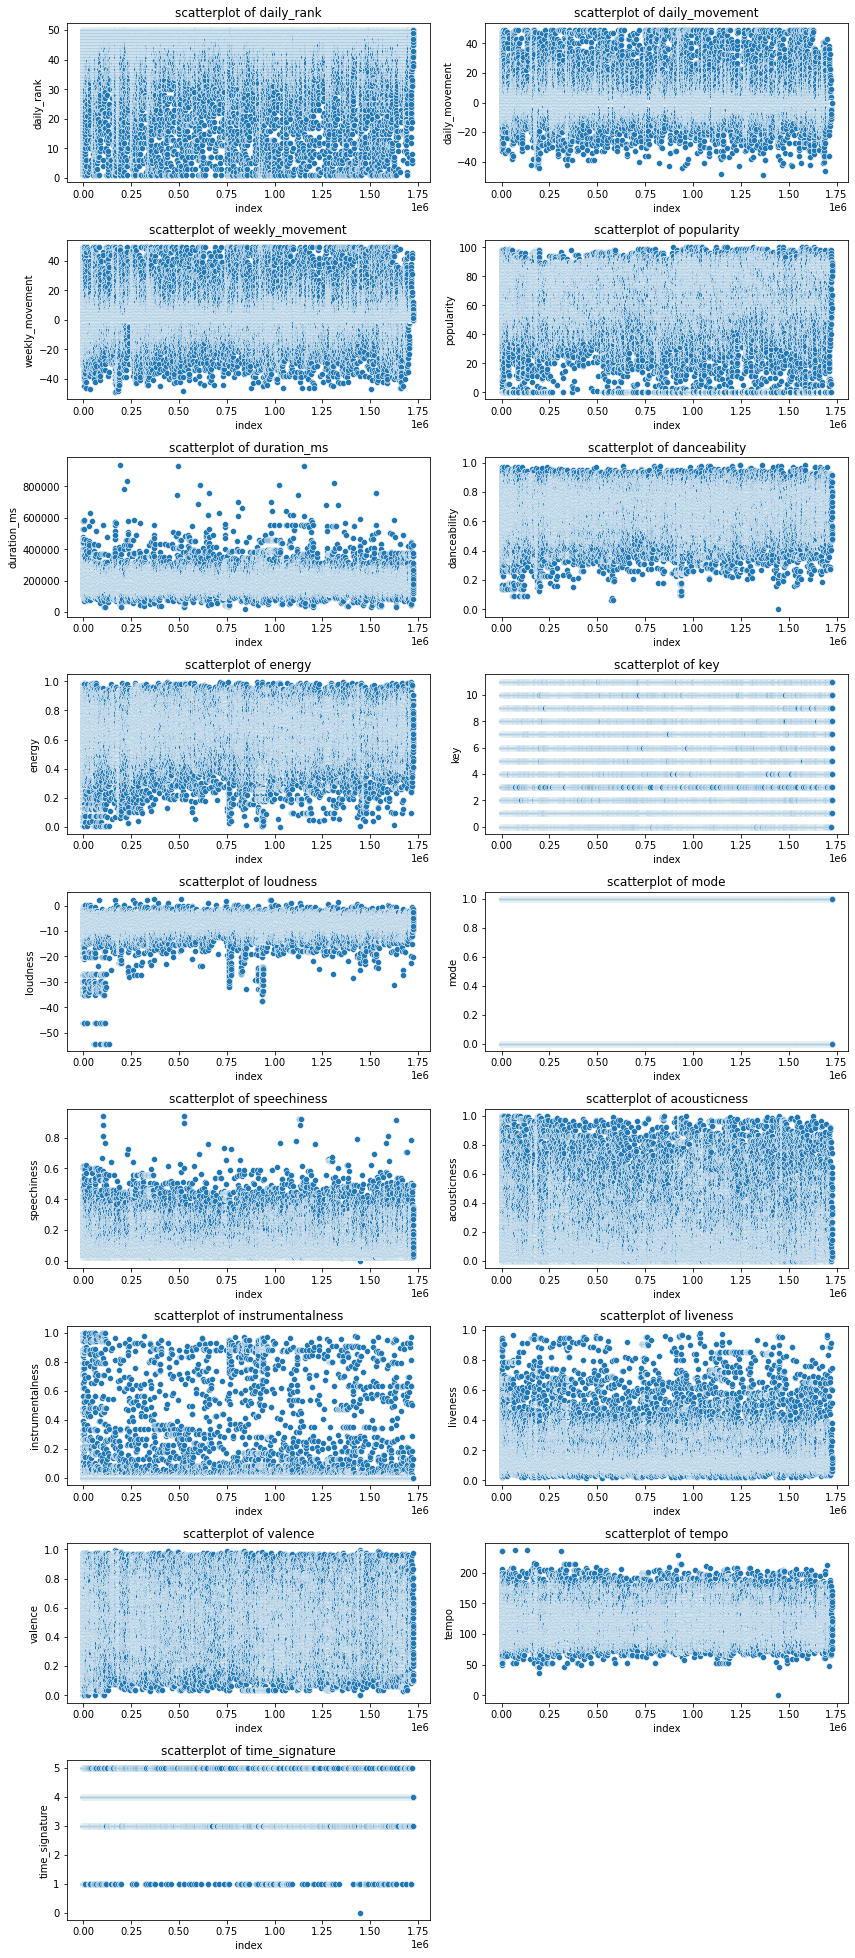

In [20]:
numf = ['daily_rank','daily_movement','weekly_movement','popularity','duration_ms',
        'danceability', 'energy','key', 'loudness','mode','speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence','tempo','time_signature']

plt.figure(figsize = (12, len(numf) * 3))
for i, feature in enumerate(numf, 1):
    plt.subplot(len(numf), 2, i)
    sns.scatterplot(x = spotifyu.index, y = spotifyu[feature])
    plt.title(f"scatterplot of {feature}")
    plt.xlabel("index")
    plt.ylabel(feature)
    
plt.tight_layout()
plt.show()

In [21]:
featureso = ['duration_ms','loudness', 'speechiness', 'tempo']
for feature in featureso:
    Q1 = spotifyu[feature].quantile(0.25)
    Q3 = spotifyu[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    spotifyu = spotifyu[(spotifyu[feature] >= lower_bound) & (spotifyu[feature] <= upper_bound)]

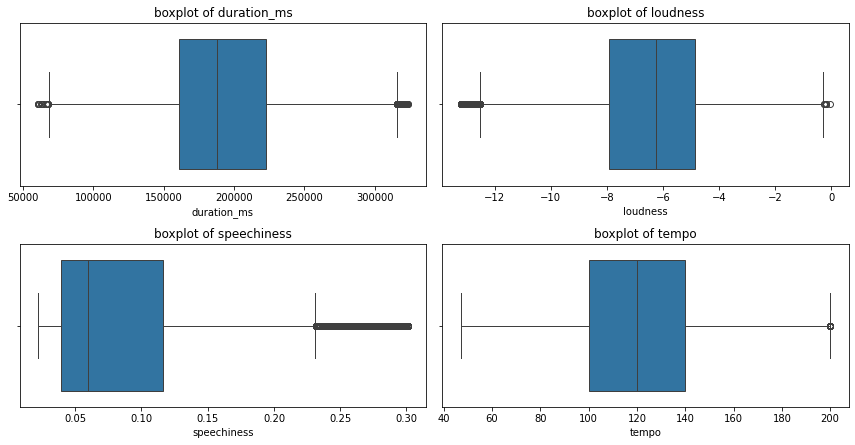

In [22]:
plt.figure(figsize = (12, len(featureso) * 3))
for i, feature in enumerate(featureso, 1):
    plt.subplot(len(featureso), 2, i)
    sns.boxplot(x = spotifyu[feature])
    plt.title(f"boxplot of {feature}")
    
plt.tight_layout()
plt.show()

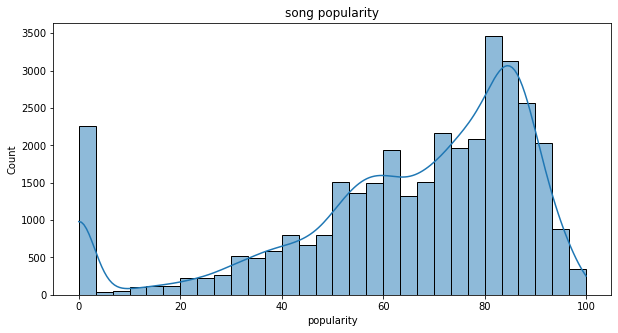

In [23]:
plt.figure(figsize = (10, 5))
sns.histplot(spotifyu['popularity'],bins = 30, kde = True)
plt.title("song popularity")
plt.show()

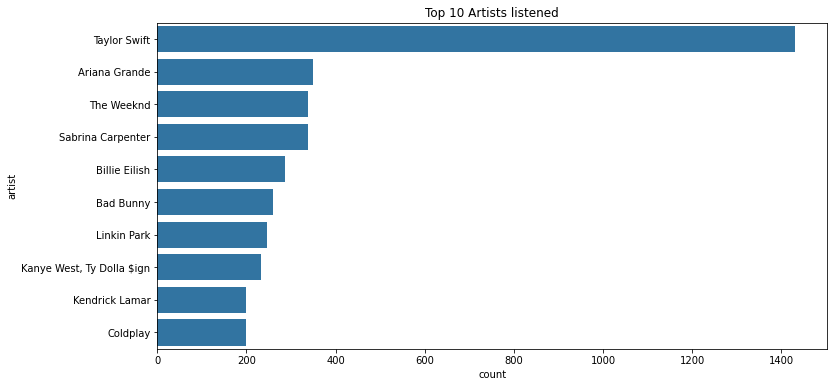

In [24]:
topa = spotifyu['artists'].value_counts().head(10)
plt.figure(figsize = (12, 6))
sns.barplot(y = topa.index, x = topa.values)
plt.title("Top 10 Artists listened")
plt.xlabel("count")
plt.ylabel("artist")
plt.show()

In [25]:
tops = spotifyu[['name',
                'artists',
                'popularity',
                'country']].sort_values(by = 'popularity', ascending = False).head(10)
tops

,name,artists,popularity,country
1012975,i like the way you kiss me,Artemas,100,SV
1044727,i like the way you kiss me,Artemas,100,CL
966115,i like the way you kiss me,Artemas,100,PA
973778,i like the way you kiss me,Artemas,100,MX
975027,i like the way you kiss me,Artemas,100,EC
989876,i like the way you kiss me,Artemas,100,CR
1013973,i like the way you kiss me,Artemas,100,MA
1025978,i like the way you kiss me,Artemas,100,ES
1026425,i like the way you kiss me,Artemas,100,CO
1036628,i like the way you kiss me,Artemas,100,HK


In [26]:
print(spotifyu['country'].unique())

['DO' 'ZA' 'VN' 'VE' 'UY' 'US' 'UA' 'TW' 'TR' 'TH' 'SV' 'SK' 'SG' 'SE'
 'SA' 'RO' 'PY' 'PT' 'PL' 'PK' 'PH' 'PE' 'PA' 'NZ' 'NO' 'NL' 'NI' 'NG'
 'MY' 'MX' 'MA' 'LV' 'LU' 'LT' 'KZ' 'KR' 'JP' 'IT' 'IS' 'IN' 'IL' 'IE'
 'ID' 'HU' 'HN' 'HK' 'GT' 'GR' 'FR' 'FI' 'ES' 'EG' 'EE' 'EC' 'DK' 'DE'
 'CZ' 'CR' 'CO' 'CL' 'CH' 'CA' 'BY' 'BR' 'BO' 'BG' 'BE' 'AU' 'AT' 'AR'
 'AE' 'GB']


In [27]:
bg = spotifyu[spotifyu['country'] == 'BG']
bg

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3288,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,1,0,0,BG,2025-02-17,88,False,...,0,-3.743,0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4
3289,21z8pee2qYV0SzbqQCb72g,Разкажи ѝ,Dessita,2,0,0,BG,2025-02-17,49,False,...,1,-5.753,0,0.0555,0.08850,0.000000,0.1610,0.668,152.056,4
3290,4np8dpfv5qahhkOSzgsMFL,Питаш ли ме,Tsvetelina Yaneva,3,1,9,BG,2025-02-17,48,False,...,1,-5.611,1,0.0738,0.03960,0.000006,0.2950,0.868,156.010,4
3291,0b2D7UMjaaIYJndNYBbdRU,Мераклия,Djordan,4,-1,-1,BG,2025-02-17,50,False,...,10,-4.562,1,0.0634,0.00302,0.000000,0.0300,0.681,164.049,4
3292,0eCynyX42rcSzLQIg2sHAy,Уау,"Medi, Sabi",5,1,-1,BG,2025-02-17,49,False,...,8,-5.035,1,0.0447,0.00754,0.000000,0.2320,0.712,141.980,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699018,5Eh1nj7IjV9lwpcKAkidyY,One Of Your Girls,Troye Sivan,50,-2,0,BG,2023-10-26,85,False,...,11,-7.852,0,0.0584,0.08780,0.006550,0.2200,0.799,93.034,4
1702652,7l0PQwiw5MZJhBSt7zMLwv,Zakachen,Kiara,44,3,-13,BG,2023-10-25,45,False,...,6,-4.934,0,0.1260,0.03350,0.000009,0.2010,0.820,159.922,4
1713561,37vQo8j33koOfhL5qK0YId,Нямаш мене,"Anelia, Konstantin",49,-3,1,BG,2023-10-22,48,False,...,1,-4.998,0,0.0697,0.46400,0.000000,0.2040,0.772,145.918,4
1717204,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,0,3,BG,2023-10-21,82,True,...,10,-5.060,1,0.0452,0.05850,0.000000,0.1320,0.476,121.879,4


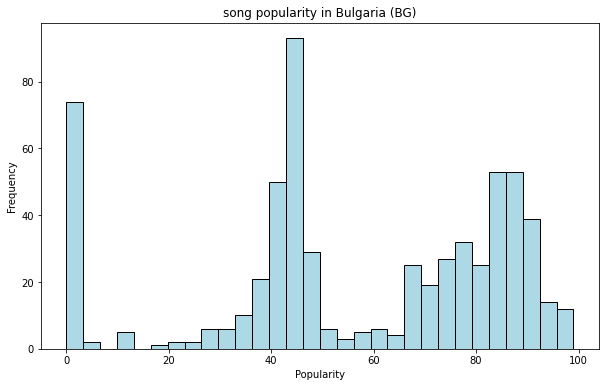

In [28]:
plt.figure(figsize = (10,6))
plt.hist(bg['popularity'], bins = 30, color = 'lightblue', edgecolor = 'black')
plt.title("song popularity in Bulgaria (BG)")
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [29]:
explicitbg = bg['is_explicit'].value_counts()
print(explicitbg)

is_explicit
False    412
True     212
Name: count, dtype: int64


In [30]:
shortestd = spotifyu.loc[spotifyu['duration_ms'].idxmin(), ['name', 'artists', 'duration_ms']]
print("shortest duration of song listened: ")
shortestd

shortest duration of song listened: 


name               الناس انواع
artists        احميده البرهومي
duration_ms              60760
Name: 575225, dtype: object

In [31]:
longestd = spotifyu.loc[spotifyu['duration_ms'].idxmax(), ['name', 'artists', 'duration_ms']]
print("longest duration of song listened: ")
longestd

longest duration of song listened: 


name           Mayın Tarlası
artists         Şebnem Ferah
duration_ms           323407
Name: 440, dtype: object

In [32]:
shortestbgd = bg.loc[bg['duration_ms'].idxmin(), ['name', 'artists', 'duration_ms']]
print("shortest duration of song listened in Bulgaria")
shortestbgd

shortest duration of song listened in Bulgaria


name           american dream
artists             21 Savage
duration_ms             63415
Name: 1407446, dtype: object

In [33]:
longestbgd = bg.loc[bg['duration_ms'].idxmax(), ['name', 'artists', 'duration_ms']]
print("Longest duration of song listened in Bulgaria")
longestbgd

Longest duration of song listened in Bulgaria


name           Nightcrawler (feat. Swae Lee & Chief Keef)
artists                Travis Scott, Swae Lee, Chief Keef
duration_ms                                        321560
Name: 1184720, dtype: object

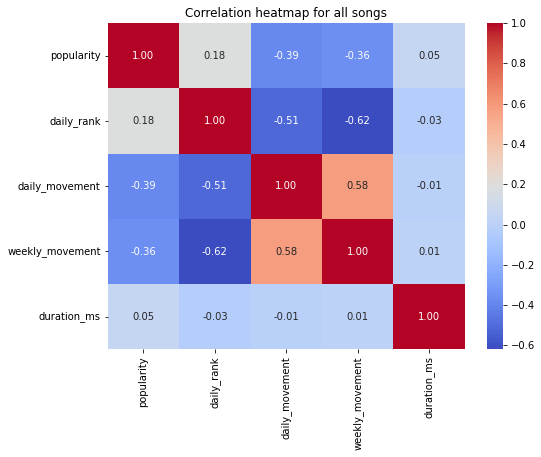

In [34]:
num_features = ['popularity', 'daily_rank' , 'daily_movement', 'weekly_movement', 'duration_ms']
corrm = spotifyu[num_features].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corrm, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation heatmap for all songs")
plt.show()

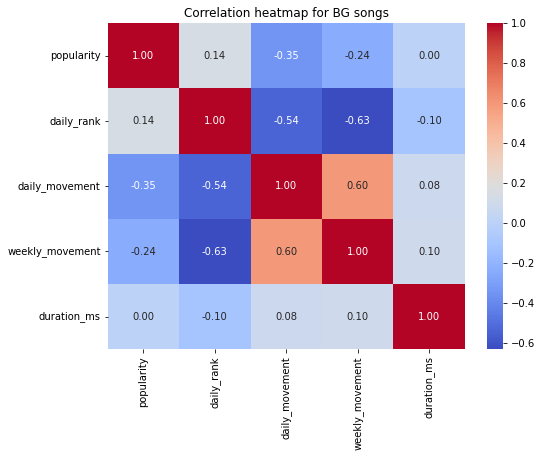

In [35]:
corrbg = bg[num_features].corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corrbg, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation heatmap for BG songs")
plt.show()

In [36]:
spotifyu[['popularity', 'daily_rank']].describe()

,popularity,daily_rank
count,35033.000000,35033.000000
mean,64.820883,39.813890
std,24.805760,12.103382
min,0.000000,1.000000
25%,53.000000,35.000000
50%,72.000000,45.000000
75%,84.000000,48.000000
max,100.000000,50.000000


In [37]:
bg[['popularity', 'daily_rank']].describe()

,popularity,daily_rank
count,624.000000,624.000000
mean,56.597756,38.216346
std,29.120055,11.860329
min,0.000000,1.000000
25%,41.000000,32.000000
50%,57.000000,42.000000
75%,83.000000,48.000000
max,99.000000,50.000000


In [38]:
commns = set(spotifyu['name']).intersection(set(bg['name']))
print("Number of common songs:", len(commns))

Number of common songs: 624


In [39]:
fastestr = spotifyu.sort_values(by = 'daily_movement', ascending = False).head(10)
print(fastestr[['name', 'artists', 'daily_movement']])

                                           name             artists  \
315345                              Motley Crew      Khaleel Mandel   
1184937                              Cabin Crew             Laaawwd   
116931               All about you - Radio Edit         SOS Project   
934029                                Apple Pie    $$Double-Dolla$$   
1194305                                The Vice         Luanne Hunt   
927579                                 One Time            Hotvibez   
925929                                 One Time            Hotvibez   
913429                             Take me back             DIMA SP   
84484                                 I Got You  Yung Rizzo, JJoyce   
1229351  Standing Next to You - Sped Up - Remix         Beat Record   

         daily_movement  
315345               49  
1184937              49  
116931               49  
934029               49  
1194305              49  
927579               49  
925929               49  
913429    

In [40]:
fastestb = bg.sort_values(by = 'daily_movement', ascending = False).head(10)
print(fastestb[['name', 'artists', 'daily_movement']])

                                                      name  \
855180                                            MARTAVAL   
1363636                                            Tonight   
851531                                           Wait 4 Me   
60991                                            São Paulo   
60992                                             Timeless   
1060184                      The Tortured Poets Department   
60993                                           Wake Me Up   
935486   Popular (with Playboi Carti & Madonna) - From ...   
763986                                           STARLIGHT   
1060187               My Boy Only Breaks His Favorite Toys   

                                    artists  daily_movement  
855180                      Uralxlr, IRAXID              48  
1363636                             Dj Alfa              48  
851531      TRACKDILLA, Gianni Blu, Ir Sais              47  
60991                            The Weeknd              46  
60992  

In [41]:
bgunique = bg.drop_duplicates(subset=['name', 'artists', 'popularity'])
print(bgunique[['name', 'artists', 'popularity']])

                                      name               artists  popularity
3288                                   Who                 Jimin          88
3289                             Разкажи ѝ               Dessita          49
3290                           Питаш ли ме     Tsvetelina Yaneva          48
3291                              Мераклия               Djordan          50
3292                                   Уау            Medi, Sabi          49
...                                    ...                   ...         ...
1699018                  One Of Your Girls           Troye Sivan          85
1702652                           Zakachen                 Kiara          45
1713561                         Нямаш мене    Anelia, Konstantin          48
1717204  SAY MY GRACE (feat. Travis Scott)  Offset, Travis Scott          82
1720845                           Sprinter     Dave, Central Cee          94

[624 rows x 3 columns]


In [42]:
fastestb = bgunique.sort_values(by = 'popularity', ascending = False).head()
print(fastestb[['name', 'artists', 'popularity']])

                                      name                artists  popularity
1063813                   End of Beginning                    Djo          99
186996     All I Want for Christmas Is You           Mariah Carey          98
3295                      Die With A Smile  Lady Gaga, Bruno Mars          98
563273                Please Please Please      Sabrina Carpenter          97
190628   Rockin' Around The Christmas Tree             Brenda Lee          97


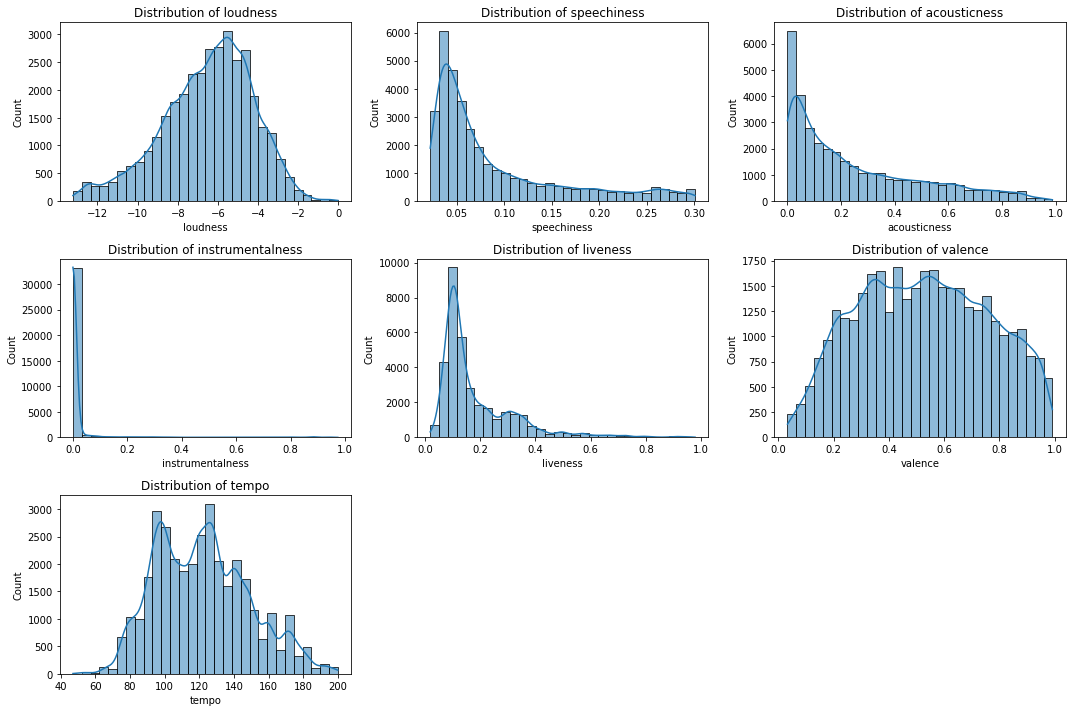

In [43]:
audio = ['loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo']
plt.figure(figsize = (15,10))
for i, feature in enumerate(audio, 1):
    plt.subplot(3, 3, i)
    sns.histplot(spotifyu[feature], kde = True, bins = 30)
    plt.title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

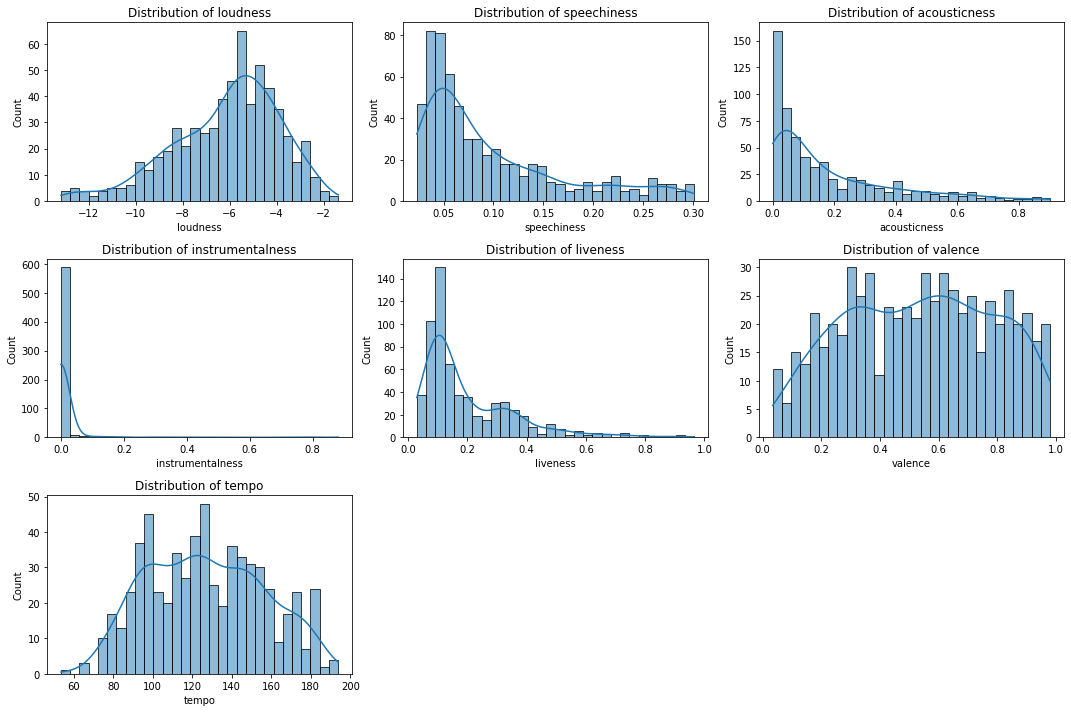

In [44]:
audio = ['loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo']
plt.figure(figsize = (15,10))
for i, feature in enumerate(audio, 1):
    plt.subplot(3, 3, i)
    sns.histplot(bg[feature], kde = True, bins = 30)
    plt.title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

In [45]:
loudests = spotifyu.loc[spotifyu['loudness'].idxmax(), ['name', 'artists', 'loudness']]
softest = spotifyu.loc[spotifyu['loudness'].idxmin(), ['name', 'artists', 'loudness']]

print(f"loudest song : ", loudests)
print(f"softest song : ", softest)

loudest song :  name               Na Contigo
artists     Chimbala, Darmiko
loudness                -0.03
Name: 1436016, dtype: object
softest song :  name        Faço tua Vida Virar
artists                   GBoss
loudness                -13.215
Name: 952012, dtype: object


In [46]:
loudests = bg.loc[bg['loudness'].idxmax(), ['name', 'artists', 'loudness']]
softest = bg.loc[bg['loudness'].idxmin(), ['name', 'artists', 'loudness']]

print(f"loudest song listened in BG : ", loudests)
print(f"softest song listened in BG : ", softest)

loudest song listened in BG :  name                      Влака
artists     VANE$$A, Konstantin
loudness                 -1.381
Name: 3313, dtype: object
softest song listened in BG :  name        "Slut!" (Taylor's Version) (From The Vault)
artists                                    Taylor Swift
loudness                                        -13.178
Name: 1680647, dtype: object


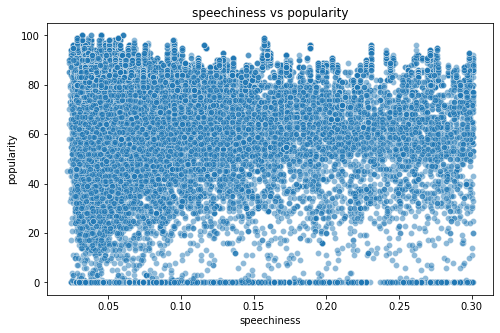

In [47]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = spotifyu['speechiness'], y = spotifyu['popularity'], alpha = 0.5)
plt.title("speechiness vs popularity")
plt.xlabel("speechiness")
plt.ylabel('popularity')
plt.show()